        OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  319073.000000  319073.000000  319073.000000  319073.000000   
mean     2317.546956    2016.560586       6.609719      13.118205   
std      1185.285543       0.996344       3.273691       6.294205   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  299074.000000  299074.000000  
mean       42.214381     -70.908272  
std         2.159766       3.493618  
min        -1.000000     -71.178674  
25%        42.297442     -71.097135  
50%        42.325538     -71.077524  
75%        42.348624     -71.062467  
max        42.395042      -1.000000  


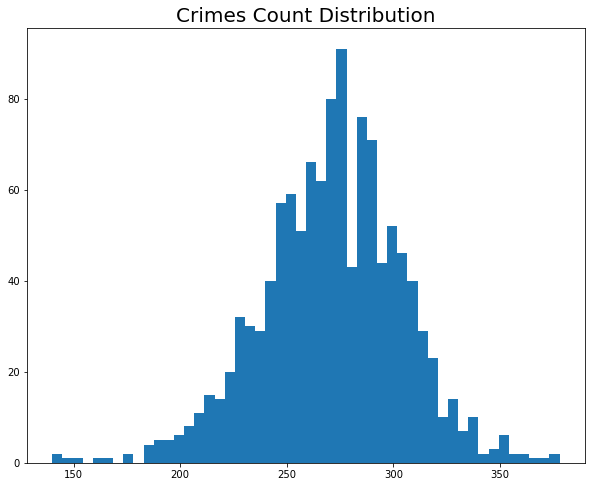

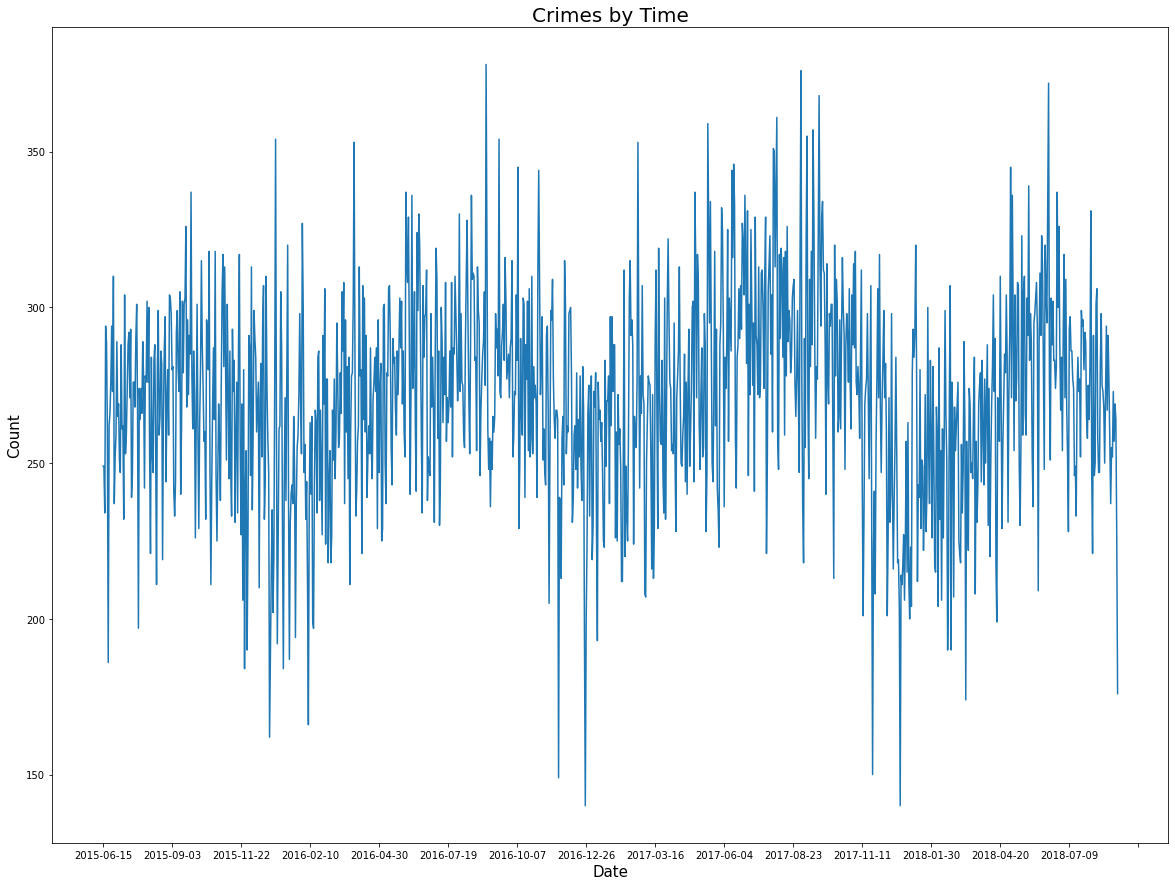

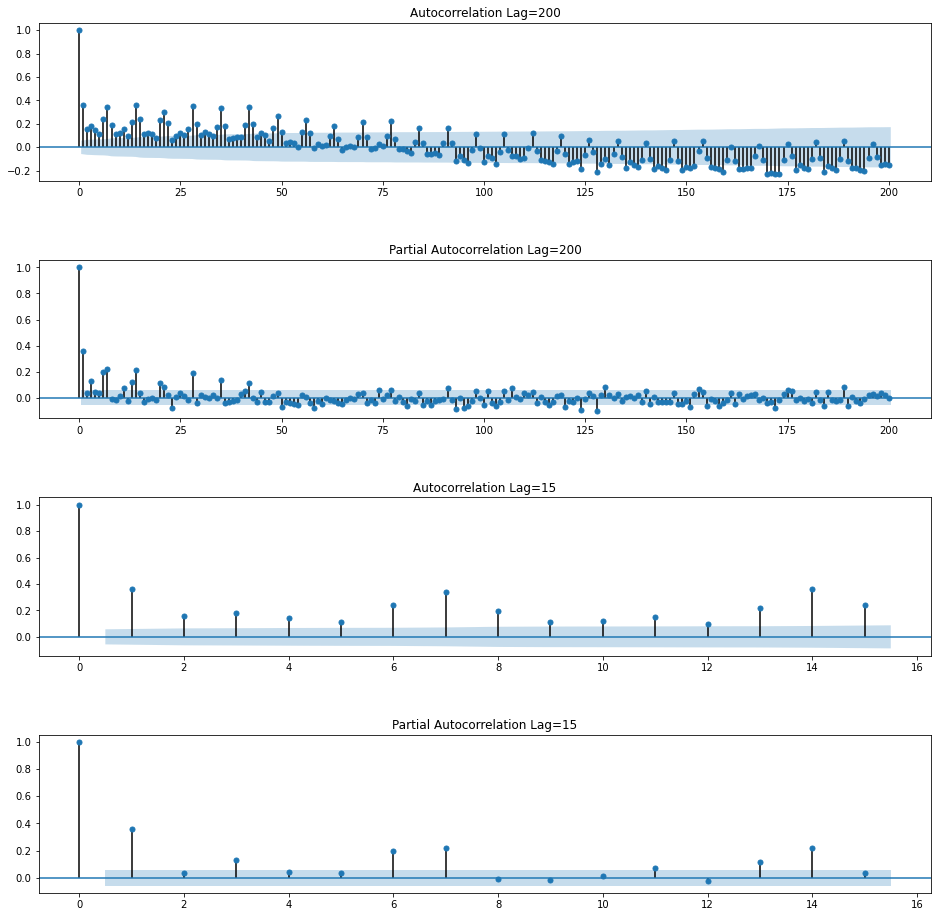

<ipython-input-15-35207f702643>:83: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(c['Count'],freq=12,model="additive")


ADF Test Result
Test Statistic                   -2.237273
p value                           0.192997
used lag                         34.000000
Number of observations used    1142.000000
Critical Value 1%                -3.436089
Critical Value 5%                -2.864074
Critical Value 10%               -2.568119
dtype: float64


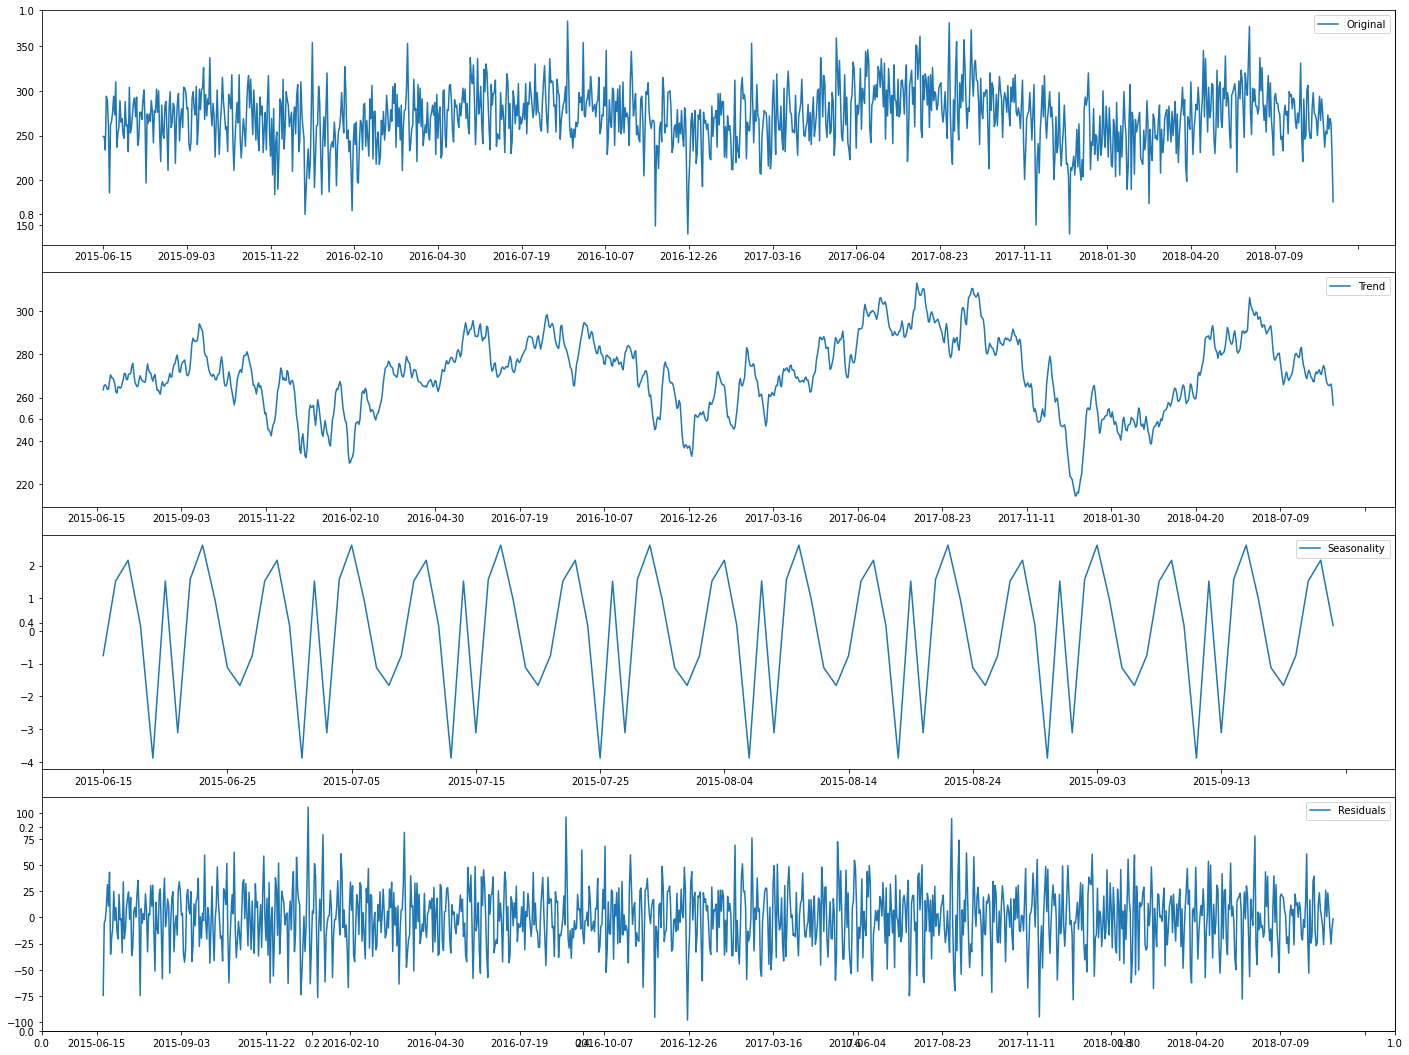

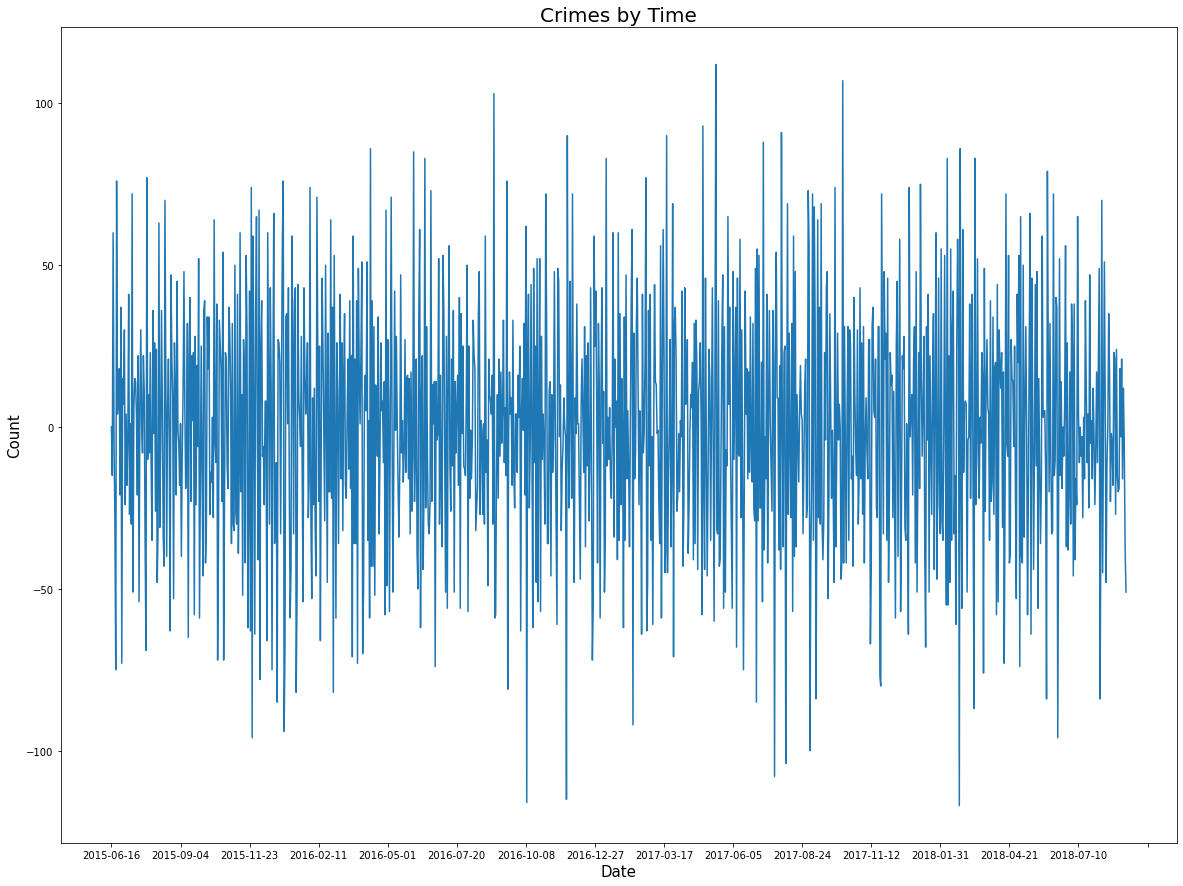

Average= -0.06207482993197279
Std= 37.349601593334036
SE= 1.0891364999989281
ADF Test Result
Test Statistic                -9.988185e+00
p value                        2.029010e-17
used lag                       3.300000e+01
Number of observations used    1.142000e+03
Critical Value 1%             -3.436089e+00
Critical Value 5%             -2.864074e+00
Critical Value 10%            -2.568119e+00
dtype: float64
None


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                           Results: ARMA
Model:              ARMA             BIC:                 11366.3482
Dependent Variable: Count            Log-Likelihood:      -5658.4   
Date:               2020-08-19 19:52 Scale:               1.0000    
No. Observations:   1177             Method:              css-mle   
Df Model:           6                Sample:              06-15-2015
Df Residuals:       1171                                  09-03-2018
Converged:          1.0000           S.D. of innovations: 29.614    
No. Iterations:     33.0000          HQIC:                11344.237 
AIC:                11330.8531                                      
---------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
const        269.9607    5.4203   49.8051  0.0000  259.3370  280.5844
ar.L1.Count    1.2068    0.0322   37.5186  0.0000    1.143

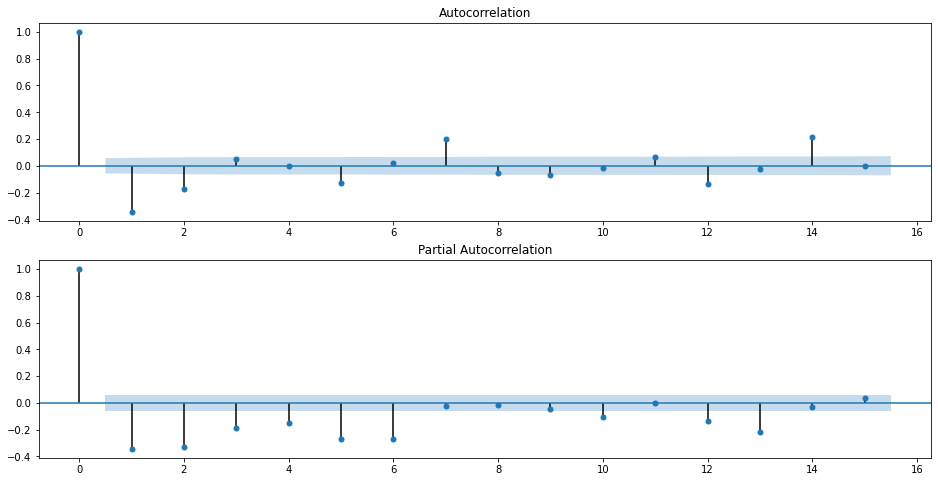

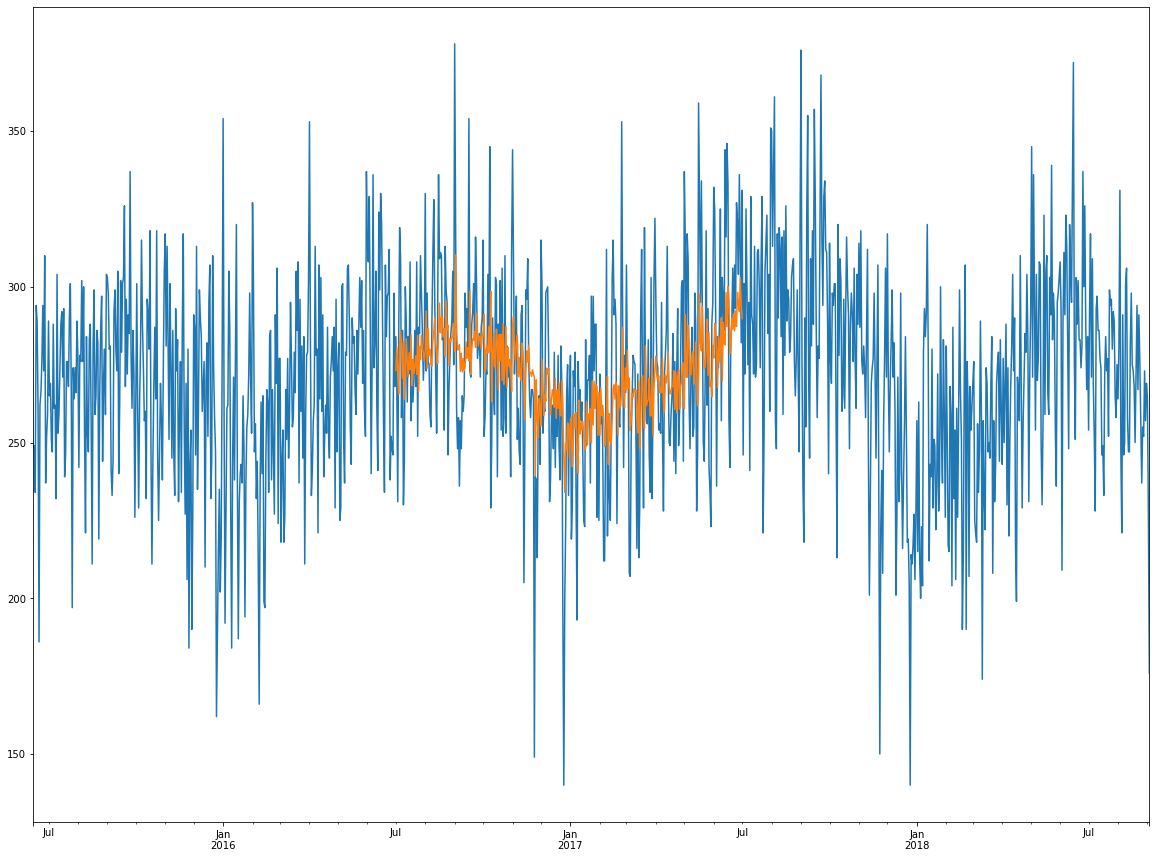

In [15]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import itertools
import sklearn
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

#import squarify

import matplotlib.ticker as ticker
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import sys
from sklearn.preprocessing import MinMaxScaler
import math

df = pd.read_csv('crime.csv',encoding='latin-1')
df.drop("INCIDENT_NUMBER",axis=1, inplace=True) 
df[["DATE","TIME"]]=df['OCCURRED_ON_DATE'].str.split(" ",expand=True)


print(df.describe())



# plot line chart
def lineplt(x,y,xlabel,ylabel,title,size,tick_spacing):
    fig,ax=plt.subplots(figsize = size)
    plt.plot(x,y)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.xlabel(xlabel,fontsize = 15)
    plt.ylabel(ylabel,fontsize = 15)
    plt.title(title,fontsize = 20)
    plt.show()

# Create 2 columes DateFrame
def createdf(c1,d1,c2,d2):
    dic = {c1:d1,c2:d2}
    df = pd.DataFrame(dic)
    return df

# Plot histogram
def plthis(d,bin, title):
    plt.figure(figsize=(10,8))
    plt.hist(d, bins=bin)
    plt.title(title, fontsize = 20)
    plt.show()
    
# Put Date and Count into a new Dataframe
c = createdf("Date",df["DATE"].value_counts().index,"Count",df["DATE"].value_counts())

# c is the total number of crimes per day
c.head(5)

plthis(c["Count"],50, "Crimes Count Distribution")



c=c.sort_values(by="Date",ascending = True)
lineplt(c["Date"],c["Count"],"Date","Count","Crimes by Time",(20,15),80)


fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(411)
fig = plot_acf(c["Count"],lags=200,ax=ax1)
plt.title('Autocorrelation Lag=200')
ax2 = fig.add_subplot(412)
fig = plot_pacf(c["Count"],lags=200,ax=ax2)
plt.title('Partial Autocorrelation Lag=200')
ax3 = fig.add_subplot(413)
fig = plot_acf(c["Count"],lags=15,ax=ax3)
plt.title('Autocorrelation Lag=15')
ax4 = fig.add_subplot(414)
fig = plot_pacf(c["Count"],lags=15,ax=ax4)
plt.title('Partial Autocorrelation Lag=15')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.5)
plt.show()

res = sm.tsa.seasonal_decompose(c['Count'],freq=12,model="additive")
# # original = res
trend = res.trend
seasonal = res.seasonal
residual = res.resid

fig,ax=plt.subplots(figsize = (20,15))
ax1 = fig.add_subplot(411)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(80))
ax1.plot(c['Count'], label='Original')
ax1.legend(loc='best')
ax2 = fig.add_subplot(412)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(80))
ax2.plot(trend, label='Trend')
ax2.legend(loc='best')
ax3 = fig.add_subplot(413)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax3.plot(seasonal[:100],label='Seasonality')
ax3.legend(loc='best')
ax4 = fig.add_subplot(414)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(80))
ax4.plot(residual, label='Residuals')
ax4.legend(loc='best')
plt.tight_layout()

def test_stationarity(series,mlag = 365, lag = None,):
    print('ADF Test Result')
    res = adfuller(series, maxlag = mlag, autolag = lag)
    output = pd.Series(res[0:4],index = ['Test Statistic', 'p value', 'used lag', 'Number of observations used'])
    for key, value in res[4].items():
        output['Critical Value ' + key] = value
    print(output)
    
test_stationarity(c['Count'],lag = 'AIC')


d1 = c.copy()
d1['Count'] = d1['Count'].diff(1)
d1 = d1.dropna()
lineplt(d1["Date"],d1["Count"],"Date","Count","Crimes by Time",(20,15),80)
print('Average= '+str(d1['Count'].mean()))
print('Std= ' + str(d1['Count'].std()))
print('SE= ' + str(d1['Count'].std()/math.sqrt(len(d1))))
print(test_stationarity(d1['Count'],lag = 'AIC'))


fig_2 = plt.figure(figsize=(16,8))
ax1_2 = fig_2.add_subplot(211)
fig_2 = plot_acf(d1["Count"],lags=15,ax=ax1_2)
ax2_2 = fig_2.add_subplot(212)
fig_2 = plot_pacf(d1["Count"],lags=15,ax=ax2_2)

timeseries = c['Count']
p,d,q = (4,1,2)
arma_mod = ARMA(timeseries,(p,d,q)).fit()
summary = (arma_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

predict_data = arma_mod.predict(start='2016-07-01', end='2017-07-01', dynamic = False)
timeseries.index = pd.DatetimeIndex(timeseries.index)
fig, ax = plt.subplots(figsize=(20, 15))
ax = timeseries.plot(ax=ax)
predict_data.plot(ax=ax)
plt.show()